<a href="https://colab.research.google.com/github/christopher-reed/tidytuesday/blob/master/2020/week_31/TidyTuesday_Penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
import seaborn as sns
from PIL import Image
import requests
from io import BytesIO

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


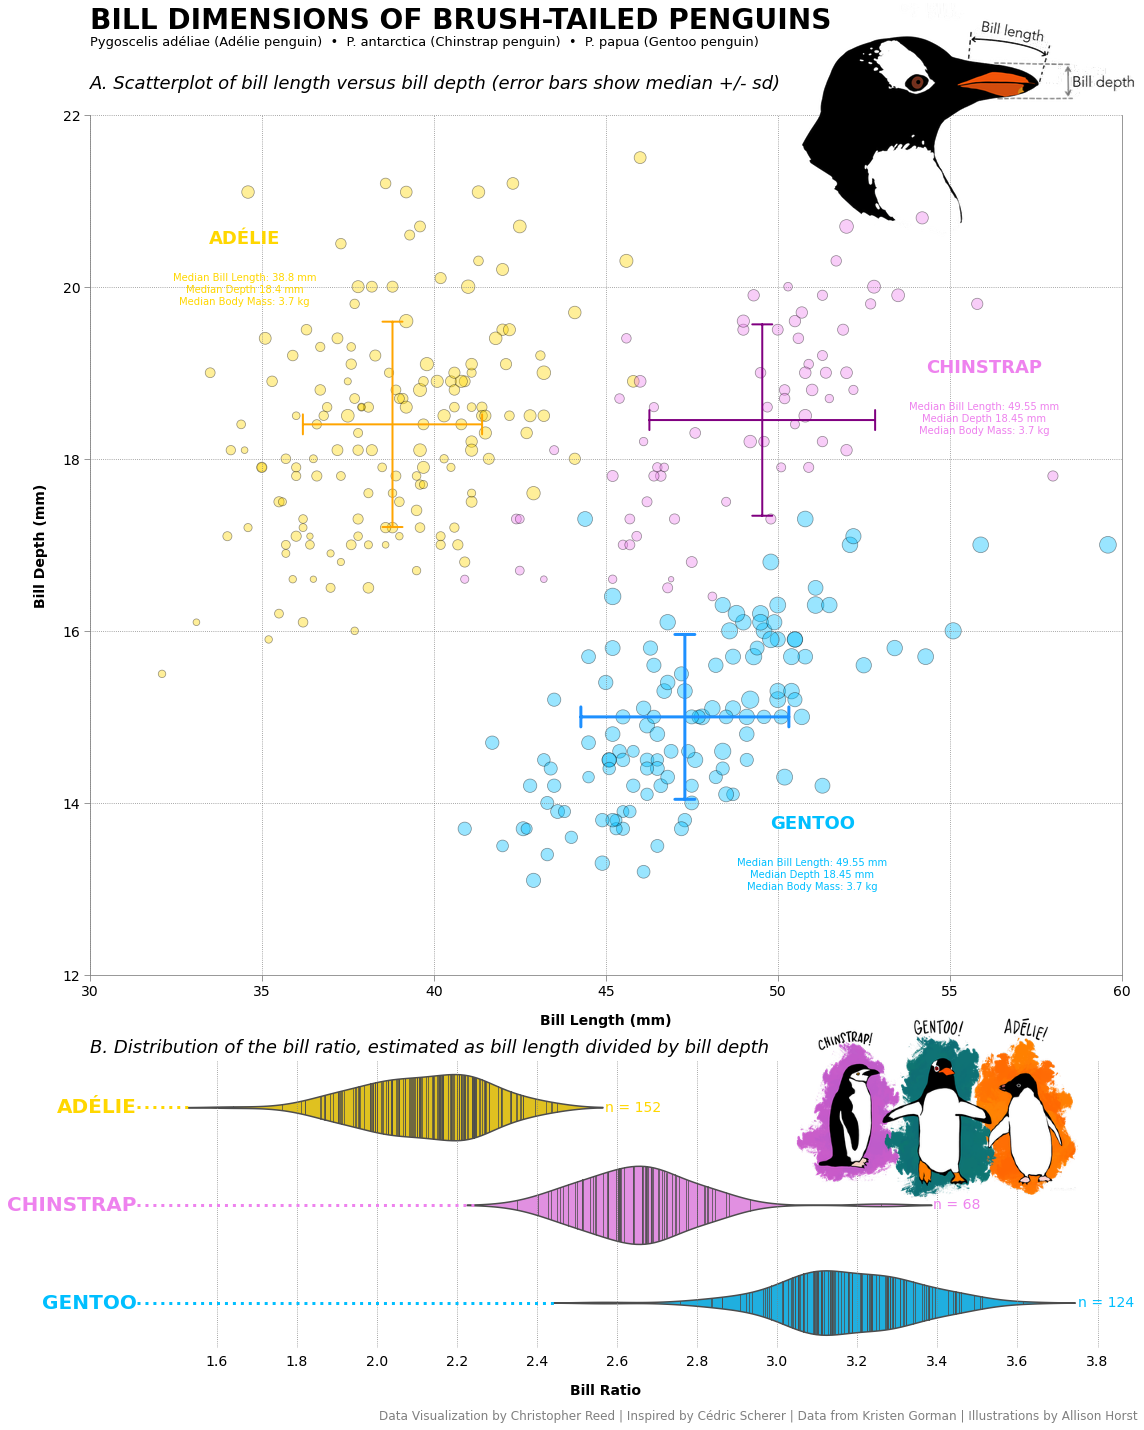

In [18]:
################
##READ IN DATA##
################

penguins = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-07-28/penguins.csv')

#############################
##READ IN AND RESIZE IMAGES##
#############################

# Bill length and depth diagram
response1 = requests.get('https://raw.githubusercontent.com/christopher-reed/tidytuesday/master/2020/week_31/images/bill_diagram_transparent.png')
img_bill = Image.open(BytesIO(response1.content))

img_bill = img_bill.resize((380,250), Image.ANTIALIAS)

# Three penguins
response2 = requests.get('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/man/figures/lter_penguins.png')
img_penguins = Image.open(BytesIO(response2.content))

img_penguins = img_penguins.resize((380,250), Image.ANTIALIAS)

####################################
##GROUP BY AND FEATURE ENGINEERING##
####################################

# Find median measurments
median = penguins.groupby('species').median()

# Find SD of measurements
sd = penguins.groupby('species').std()

# Find bill length ratio
penguins['bill_ratio'] = penguins['bill_length_mm'] / penguins['bill_depth_mm']

################################################
##CALCULATE CENTER POINT AND LENGTH OF CROSSES##
################################################

# Calculate median point for length and depth for each of the species
adelie_median_point = [median.loc['Adelie', 'bill_length_mm'], median.loc['Adelie', 'bill_depth_mm']]
gentoo_median_point = [median.loc['Gentoo', 'bill_length_mm'], median.loc['Gentoo', 'bill_depth_mm']]
chinstrap_median_point = [median.loc['Chinstrap', 'bill_length_mm'], median.loc['Chinstrap', 'bill_depth_mm']]

# Calculate the length of the crosses
adelie_length_line = [median.loc['Adelie', 'bill_length_mm'] - sd.loc['Adelie', 'bill_length_mm'], median.loc['Adelie', 'bill_length_mm'] + sd.loc['Adelie', 'bill_length_mm']]
adelie_depth_line = [median.loc['Adelie', 'bill_depth_mm'] - sd.loc['Adelie', 'bill_depth_mm'], median.loc['Adelie', 'bill_depth_mm'] + sd.loc['Adelie', 'bill_depth_mm']]

chinstrap_length_line = [median.loc['Chinstrap', 'bill_length_mm'] - sd.loc['Chinstrap', 'bill_length_mm'], median.loc['Chinstrap', 'bill_length_mm'] + sd.loc['Chinstrap', 'bill_length_mm']]
chinstrap_depth_line = [median.loc['Chinstrap', 'bill_depth_mm'] - sd.loc['Chinstrap', 'bill_depth_mm'], median.loc['Chinstrap', 'bill_depth_mm'] + sd.loc['Chinstrap', 'bill_depth_mm']]

gentoo_length_line = [median.loc['Gentoo', 'bill_length_mm'] - sd.loc['Gentoo', 'bill_length_mm'], median.loc['Gentoo', 'bill_length_mm'] + sd.loc['Gentoo', 'bill_length_mm']]
gentoo_depth_line = [median.loc['Gentoo', 'bill_depth_mm'] - sd.loc['Gentoo', 'bill_depth_mm'], median.loc['Gentoo', 'bill_depth_mm'] + sd.loc['Gentoo', 'bill_depth_mm']]


########################
##DEFINE COLOR PALETTE##
########################


palette = {'Gentoo':'deepskyblue',
           'Chinstrap': 'violet',
           'Adelie':'gold'}

###################
##CREATE SUBPLOTS##
###################

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (16,20), tight_layout = True, gridspec_kw={'height_ratios': [3, 1]})

#####################################
##FIGURE 1: SCATTERPLOT AND CROSSES##
#####################################

# Scatterplot
ax1 = sns.scatterplot(x = 'bill_length_mm', y = 'bill_depth_mm', hue = 'species', size = 'body_mass_g', sizes = (30,300), alpha = 0.4, palette = palette, edgecolor = 'black', data = penguins, legend = False, ax = ax1)

# Median point and SD crosses

# ADELIE - Components
ax1.annotate(s = '', xy = (adelie_length_line[0], adelie_median_point[1]), xytext = (adelie_length_line[1], adelie_median_point[1]), arrowprops = {'arrowstyle':'|-|',
                                                                                                                                                             'color':'orange',
                                                                                                                                                             'lw':2})
ax1.annotate(s = '', xy = (adelie_median_point[0], adelie_depth_line[0]), xytext = (adelie_median_point[0], adelie_depth_line[1]), arrowprops = {'arrowstyle':'|-|',
                                                                                                                                                             'color':'orange',
                                                                                                                                                             'lw':2})
ax1.annotate('ADÉLIE', xy = (34.5,20.5), fontsize = 18, fontweight = 'bold', color = palette['Adelie'], ha = 'center')
ax1.annotate('Median Bill Length: ' + str(median.loc['Adelie', 'bill_length_mm']) + ' mm\n' + 'Median Depth ' + str(median.loc['Adelie', 'bill_depth_mm']) + ' mm\n' + 'Median Body Mass: ' + str(median.loc['Adelie', 'body_mass_g']/1000) + ' kg', 
             xy = (34.5,19.8), ha = 'center', color = palette['Adelie'], fontsize = 10)


# CHINSTRAP - Components
ax1.annotate(s = '', xy = (chinstrap_length_line[0], chinstrap_median_point[1]), xytext = (chinstrap_length_line[1], chinstrap_median_point[1]), arrowprops = {'arrowstyle':'|-|',
                                                                                                                                                             'color':'purple',
                                                                                                                                                             'lw':2})
ax1.annotate(s = '', xy = (chinstrap_median_point[0], chinstrap_depth_line[0]), xytext = (chinstrap_median_point[0], chinstrap_depth_line[1]), arrowprops = {'arrowstyle':'|-|',
                                                                                                                                                             'color':'purple',
                                                                                                                                                             'lw':2})

ax1.annotate('CHINSTRAP', xy = (56,19), fontsize = 18, fontweight = 'bold', color = palette['Chinstrap'], ha = 'center')
ax1.annotate('Median Bill Length: ' + str(median.loc['Chinstrap', 'bill_length_mm']) + ' mm\n' + 'Median Depth ' + str(median.loc['Chinstrap', 'bill_depth_mm']) + ' mm\n' + 'Median Body Mass: ' + str(median.loc['Chinstrap', 'body_mass_g']/1000) + ' kg', 
             xy = (56,18.3), ha = 'center', color = palette['Chinstrap'], fontsize = 10)


# GENTOO - Components
ax1.annotate(s = '', xy = (gentoo_length_line[0], gentoo_median_point[1]), xytext = (gentoo_length_line[1], gentoo_median_point[1]), arrowprops = {'arrowstyle':'|-|',
                                                                                                                                                             'color':'dodgerblue',
                                                                                                                                                             'lw':3})
ax1.annotate(s = '', xy = (gentoo_median_point[0], gentoo_depth_line[0]), xytext = (gentoo_median_point[0], gentoo_depth_line[1]), arrowprops = {'arrowstyle':'|-|',
                                                                                                                                                             'color':'dodgerblue',
                                                                                                                                                             'lw':3})

ax1.annotate('GENTOO', xy = (51,13.7), fontsize = 18, fontweight = 'bold', color = palette['Gentoo'], ha = 'center')
ax1.annotate('Median Bill Length: ' + str(median.loc['Chinstrap', 'bill_length_mm']) + ' mm\n' + 'Median Depth ' + str(median.loc['Chinstrap', 'bill_depth_mm']) + ' mm\n' + 'Median Body Mass: ' + str(median.loc['Chinstrap', 'body_mass_g']/1000) + ' kg', 
             xy = (51,13), ha = 'center', color = palette['Gentoo'], fontsize = 10)

# IMAGE - Bill length and depth diagram
imagebox = OffsetImage(img_bill)
imagebox.image.axes = ax1
xy = (0.85, 0.91)
ab = AnnotationBbox(imagebox, xy,
                    frameon = False,
                    xycoords ='figure fraction',
                    )
ab.set_zorder(10)
ax1.add_artist(ab)


##########################
##FORMATTING SCATTERPLOT##
##########################

# Titles
ax1.text(0, 1.1, 'BILL DIMENSIONS OF BRUSH-TAILED PENGUINS',  ha = 'left', transform = ax1.transAxes, fontsize = 28, fontweight = 'bold')
ax1.text(0, 1.08, 'Pygoscelis adéliae (Adélie penguin)  •  P. antarctica (Chinstrap penguin)  •  P. papua (Gentoo penguin)', ha = 'left', transform = ax1.transAxes, fontsize = 13)
ax1.text(0, 1.03, 'A. Scatterplot of bill length versus bill depth (error bars show median +/- sd)', fontsize = 18, style = 'italic', ha = 'left', transform = ax1.transAxes)

# Axes Labels
ax1.set_ylabel('Bill Depth (mm)', fontsize = 14, weight = 'bold', labelpad = 15)
ax1.set_xlabel('Bill Length (mm)', fontsize = 14, weight = 'bold', labelpad =15)

# Tick labels
ax1_xticks = ax1.get_xticks()
ax1_yticks = ax1.get_yticks()

ax1.set_xticklabels(ax1_xticks.astype(int), fontsize = 14)
ax1.set_yticklabels(ax1_yticks.astype(int), fontsize = 14)

# Tick params
ax1.tick_params(axis = 'both', color = 'grey', length = 6)

# Grid and axes lines
ax1.grid(b = True, which = 'major', color =  'grey', linestyle = ':')

for side in ['bottom', 'top', 'right', 'left']:
  ax1.spines[side].set_color('grey')

ax1.set_xlim(left = 30, right = 60)
ax1.set_ylim(bottom = 12, top = 22)

ax1.spines['top'].set_visible(False)
###################################
##FIGURE 2: VIOLIN PLOT AND SWARM##
###################################

# Violin plot
sns.violinplot( y = 'species', x = 'bill_ratio', data = penguins, inner = 'stick', palette = palette, order = ['Adelie', 'Chinstrap', 'Gentoo'], ax = ax2)

# Horizontal lines
ax2.plot([1.4, 1.53],[0, 0], ls = ':', color = palette['Adelie'], linewidth = 3)
ax2.plot([1.4, 2.25],[1, 1], ls = ':', color = palette['Chinstrap'], linewidth = 3)
ax2.plot([1.4, 2.45],[2, 2], ls = ':', color = palette['Gentoo'], linewidth = 3)


#########################
##FORMATTING VIOLINPLOT##
#########################

# Axes Labels / Title
ax2.text(0, 1.03, 'B. Distribution of the bill ratio, estimated as bill length divided by bill depth', fontsize = 18, style = 'italic', ha = 'left', transform = ax2.transAxes)
ax2.set_ylabel('')
ax2.set_xlabel('Bill Ratio', fontsize = 14, weight = 'bold', labelpad =15)

# Tick params to remove ticks on both axes
ax2.tick_params(axis = 'both', left = False, bottom = False, labelsize = 14)

# Specify ticks on x-axis
ax2.set_xticks(np.arange(1.6, 4.0, 0.2))

# Adjusted y-tick labels
ax2.set_yticklabels(['', '', ''])

# Grid and axes lines
ax2.grid(b = True, which = 'major', axis = 'x', color =  'grey', linestyle = ':')

# Text
ax2.text(1.4, 0, 'ADÉLIE', ha = 'right', va = 'center', fontsize = 20, weight = 'bold', color = palette['Adelie'])
ax2.text(1.4, 1, 'CHINSTRAP', ha = 'right', va = 'center', fontsize = 20, weight = 'bold', color = palette['Chinstrap'])
ax2.text(1.4, 2, 'GENTOO', ha = 'right', va = 'center', fontsize = 20, weight = 'bold', color = palette['Gentoo'])

# Sample size and text
adelie_sample = 'n = ' + str(penguins[penguins['species'] == 'Adelie'].shape[0])
chinstrap_sample = 'n = ' + str(penguins[penguins['species'] == 'Chinstrap'].shape[0])
gentoo_sample = 'n = ' + str(penguins[penguins['species'] == 'Gentoo'].shape[0])

ax2.text(2.57, 0, adelie_sample, fontsize = 14, ha = 'left', va = 'center', color = palette['Adelie'])
ax2.text(3.39, 1, chinstrap_sample, fontsize = 14, ha = 'left', va = 'center', color = palette['Chinstrap'])
ax2.text(3.75, 2, gentoo_sample, fontsize = 14, ha = 'left', va = 'center', color = palette['Gentoo'])

# Despine
for side in ['bottom', 'top', 'right', 'left']:
  ax2.spines[side].set_visible(False)

# IMAGE - Three Penguins
imagebox = OffsetImage(img_penguins, zoom = 0.8)
imagebox.image.axes = ax2
xy = (3.4, 0)
ab = AnnotationBbox(imagebox, xy,
                    frameon = False,
                    xycoords ='data',
                    )
ab.set_zorder(10)
ax2.add_artist(ab)


####################
##ACKNOWLEDGEMENTS##
####################

ax2.text(3.9, 3.2, 'Data Visualization by Christopher Reed | Inspired by Cédric Scherer | Data from Kristen Gorman | Illustrations by Allison Horst', ha = 'right', fontsize = 12, color = 'grey')

############################
##SUBPLOT SPACING AND SAVE##
############################

plt.subplots_adjust(top = 1.5)
plt.savefig('penguins.jpg', bbox_inches = 'tight')